# Nelson Siegel Svensson Model 

#### Auteur: Rayen Ayari

In [1]:
import pandas as pd

On doit lire le fichier de données et extraire le pilier de maturité de l'index.

In [71]:
zc=pd.read_csv("ZC_FRANCE.csv",sep=';',index_col=0)


Par exemple, "IO1403M" Signifie 3 mois, "IO1407Y" signifie 7 ans ...

In [73]:
list(zc.index.unique())

['I01403M Index',
 'I01407Y Index',
 'I01408Y Index',
 'I01406M Index',
 'I01409Y Index',
 'I01401Y Index',
 'I01402Y Index',
 'I01410Y Index',
 'I01403Y Index',
 'I01415Y Index',
 'I01420Y Index',
 'I01404Y Index',
 'I01405Y Index',
 'I01430Y Index',
 'I01406Y Index']

In [74]:
zc

,date,Taux
Index,,
I01403M Index,01/01/2020,-0.670
I01407Y Index,01/01/2020,-0.148
I01408Y Index,01/01/2020,-0.058
I01406M Index,01/01/2020,-0.671
I01409Y Index,01/01/2020,0.042
...,...,...
I01420Y Index,08/02/2022,1.031
I01404Y Index,08/02/2022,0.154
I01430Y Index,08/02/2022,1.202


Pour chaque date d'observation, on a 15 pilliers de maturité comme suit:
 - 3 mois
 - 6 mois
 - 1 an
 - 2 ans
 - 3 ans 
 - 4 ans 
 - 5 ans
 - 6 ans
 - 7 ans
 - 8 ans 
 - 9 ans
 - 10 ans
 - 15 ans 
 - 20 ans
 - 30 ans

Pour plus d'efficacité et clarté, on va pivoter la trame de données. Ceci est fait par la fonction pivot intégrée dans pandas.<br>
En effet, on veut avoir une meilleure visualisation de la Timeseries.

In [76]:
zc=pd.pivot_table(zc,index=["date"],columns="Index",values="Taux")

In [83]:
zc

Index,I01401Y Index,I01402Y Index,I01403M Index,I01403Y Index,I01404Y Index,I01405Y Index,I01406M Index,I01406Y Index,I01407Y Index,I01408Y Index,I01409Y Index,I01410Y Index,I01415Y Index,I01420Y Index,I01430Y Index
date,,,,,,,,,,,,,,,
01/01/2020,-0.614,-0.607,-0.670,-0.546,-0.456,-0.338,-0.671,-0.241,-0.148,-0.058,0.042,0.119,0.455,0.721,0.990
01/01/2021,-0.702,-0.735,-0.751,-0.722,-0.685,-0.638,-0.681,-0.600,-0.551,-0.487,-0.408,-0.339,-0.061,0.125,0.375
01/02/2021,-0.635,-0.690,-0.638,-0.678,-0.648,-0.599,-0.643,-0.556,-0.491,-0.414,-0.340,-0.265,0.028,0.222,0.476
01/02/2022,-0.657,-0.456,-0.679,-0.282,-0.131,-0.033,-0.671,0.009,0.126,0.203,0.302,0.415,0.698,0.869,1.060
01/03/2021,-0.614,-0.652,-0.611,-0.624,-0.575,-0.496,-0.615,-0.431,-0.345,-0.250,-0.156,-0.074,0.224,0.430,0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/07/2020,-0.581,-0.641,-0.577,-0.632,-0.603,-0.554,-0.581,-0.504,-0.446,-0.367,-0.290,-0.220,0.076,0.266,0.518
31/08/2020,-0.577,-0.597,-0.575,-0.578,-0.539,-0.479,-0.593,-0.417,-0.358,-0.270,-0.188,-0.113,0.181,0.377,0.635
31/08/2021,-0.672,-0.672,-0.657,-0.630,-0.562,-0.481,-0.690,-0.442,-0.345,-0.243,-0.148,-0.052,0.299,0.525,0.784


Maintenant, on renomme les colonnes. Pour ça, on utilise la fonction col_to_int qui detecte le pillier de maturité dans la chaine de caractères.

In [94]:
def col_to_int(x):
    u=x[x.index('4')+1:x.index(' ')]
    if u[-1]=="Y":
        return 12*int(u[:-1])
    else:
        return int(u[:-1])

In [114]:
# axis 1 signifie qu'on l'applique sur les colonnes.
zc.rename((lambda x: col_to_int(x)),axis=1,inplace=True)
# On trie les maturités par ordre ascendant
zc.sort_index(axis=1,inplace=True)
# on renomme l'index en maturité
zc.index.name = None
zc.columns.name="maturity"

In [122]:
zc

maturity,3,6,12,24,36,48,60,72,84,96,108,120,180,240,360
01/01/2020,-0.670,-0.671,-0.614,-0.607,-0.546,-0.456,-0.338,-0.241,-0.148,-0.058,0.042,0.119,0.455,0.721,0.990
01/01/2021,-0.751,-0.681,-0.702,-0.735,-0.722,-0.685,-0.638,-0.600,-0.551,-0.487,-0.408,-0.339,-0.061,0.125,0.375
01/02/2021,-0.638,-0.643,-0.635,-0.690,-0.678,-0.648,-0.599,-0.556,-0.491,-0.414,-0.340,-0.265,0.028,0.222,0.476
01/02/2022,-0.679,-0.671,-0.657,-0.456,-0.282,-0.131,-0.033,0.009,0.126,0.203,0.302,0.415,0.698,0.869,1.060
01/03/2021,-0.611,-0.615,-0.614,-0.652,-0.624,-0.575,-0.496,-0.431,-0.345,-0.250,-0.156,-0.074,0.224,0.430,0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/07/2020,-0.577,-0.581,-0.581,-0.641,-0.632,-0.603,-0.554,-0.504,-0.446,-0.367,-0.290,-0.220,0.076,0.266,0.518
31/08/2020,-0.575,-0.593,-0.577,-0.597,-0.578,-0.539,-0.479,-0.417,-0.358,-0.270,-0.188,-0.113,0.181,0.377,0.635
31/08/2021,-0.657,-0.690,-0.672,-0.672,-0.630,-0.562,-0.481,-0.442,-0.345,-0.243,-0.148,-0.052,0.299,0.525,0.784
31/12/2020,-0.756,-0.684,-0.702,-0.736,-0.723,-0.686,-0.639,-0.601,-0.552,-0.487,-0.409,-0.339,-0.062,0.125,0.374


#### Yield curve for the 20 first dates

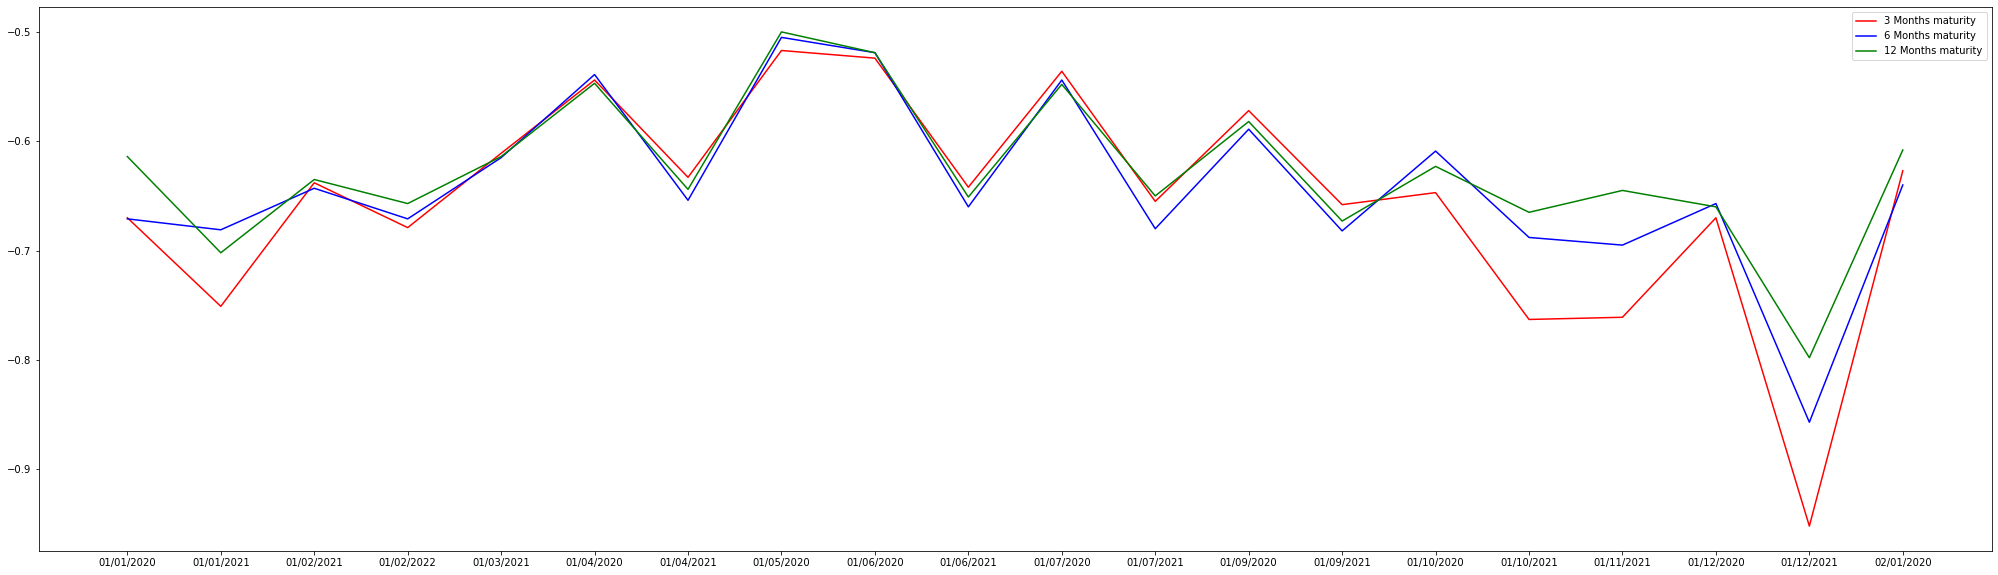

In [142]:
fig, ax = plt.subplots(figsize=(35,10))
plt.plot(zc[3][:20],label="3 Months maturity",color='red')
plt.plot(zc[6][:20],label="6 Months maturity",color='blue')
plt.plot(zc[12][:20],label="12 Months maturity",color='green')
ax.legend()
plt.show()


In [145]:
zc.columns

Int64Index([3, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 180, 240, 360], dtype='int64', name='maturity')

# Estimation des paramètres du modèle de Nelson Siegel Svensson donné:

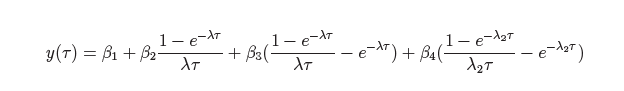

In [147]:
from IPython import display
display.Image("image001.png")

Ce modèle est considéré comme un modèle Nelson Siegel Svensson car $\beta_4 \ne 0$ <br>
Un bénefice de ce modèle est qu'on peut interpréter $\beta_1$ comme l'interet sur le long terme et $\beta_1+\beta_2$ comme l'interet instantané sur le court-terme (Yallup, 2011). <br>
Dans cette partie, on suppose que $\lambda_1$=0.0609 et  $\lambda_2$=0.01.<br>
Ces paramètres sont ceux utilisés par Diebold and Li (2006). <br>
En effet, on a pris comme base pour les pilliers de maturité le nombre de mois et non pas d'années. Un rééchelonnement de  $\lambda_1$ et  $\lambda_2$ donné dans le mail s'avère donc nécessaire.


On peut ainsi observer le problème comme étant un problème d'optimisation à 4 paramètres pour chaque date d'observation <br>
On utilisera l'algorithme Nelder-Mead simplex pour cette optimisation.<br>
Pour chaque date d'observation (Par exemple 01/01/2020), on executera l optimisation.<br>
On peut remarquer que pour chaque $\tau$, on a 550 observations.<br>

In [251]:
from scipy.optimize import minimize
import numpy as np
lambda1,lambda2=0.0609,0.01
    # implementation du model  nelson siegel svensson
    # maturities: 15*1 maturités pour lequelles on veut calculer l'interet
    # beta_k representent les facteurs paremetres du modele NSS qu'ont veut trouver
    
    # lambda_k representent les parametres de taille du modele NSS
lambda1 = .0609
lambda2=0.01
    #convertir les indices de zc en datetime 
ratedata=zc.copy()
ratedata.index = pd.to_datetime(ratedata.index, format='%d/%m/%Y')


_alpha2 = lambda x: (1.-np.exp(-lambda1*x)) / (lambda1*x)
_alpha3 = lambda x: ((1.-np.exp(-lambda1*x)) / (lambda1*x)) - \
np.exp(-lambda1*x)
_alpha4 = lambda x: ((1.-np.exp(-lambda2*x)) / (lambda2*x)) - \
np.exp(-lambda2*x)
# maturités pour lequelles on veut predire les betas 
maturities=np.array(zc.columns)
# creation d une matrice 2d pour les betas pour chaque pillier de maturité
X = np.zeros((len(maturities), 3))
X[:,0] = _alpha2(maturities)
X[:,1] = _alpha3(maturities)
X[:,2] = _alpha4(maturities)
X = sm.add_constant(X)

# pour chaque observation, ajuster la courbe de maturité
beta_fits = np.zeros((len(ratedata), 4))
residuels = np.zeros((len(ratedata), 15))
for i in range(0, len(ratedata)):
    # On utilise un modele de regression pour trouver les parametres
    model = sm.regression.linear_model.OLS(ratedata.iloc[i], X)
    results = model.fit()
    beta_fits[i,:4] = results.params
    # implementation de la fct residuelle entre l'interet prédit et le vrai interet. 
    residuels[i,:] = results.resid

# obtention des residuels et des beta 
beta_fits = pd.DataFrame(beta_fits, columns=['beta1','beta2','beta3','beta4'])
residuels = pd.DataFrame(residuals, columns=[str(mat) for mat in maturities])

beta_fits.index = ratedata.index
residuels.index = ratedata.index

 On execute la fct de minimisation pour chaque date d'observation et ono btient une dataframe associée: beta fits

On obtient les estimations suivantes:

In [252]:
beta_fits

,beta1,beta2,beta3,beta4
2020-01-01,2.905946,-3.330230,-4.173525,-6.293086
2021-01-01,2.147414,-2.652368,-3.280961,-6.019584
2021-02-01,2.279339,-2.670732,-3.551292,-6.086960
2022-02-01,2.372878,-2.956425,-3.149963,-4.097669
2021-03-01,2.397923,-2.743605,-3.865086,-5.673357
...,...,...,...,...
2020-07-31,2.299629,-2.624803,-3.562870,-6.006473
2020-08-31,2.409698,-2.752380,-3.607243,-5.951411
2021-08-31,2.724287,-3.128225,-4.144938,-6.411980
2020-12-31,2.146359,-2.655902,-3.274683,-6.019467


### On peut verifier si on a trouvé une solution pour toutes les dates observées

In [253]:
beta_fits.isnull().sum() 

beta1    0
beta2    0
beta3    0
beta4    0
dtype: int64

La réponse est oui.

 On obtient aussi  une trame de données contenant les residuels.

In [267]:
residuels

,3,6,12,24,36,48,60,72,84,96,108,120,180,240,360
2020-01-01,-0.101845,-0.006031,0.142743,0.107467,0.016898,-0.053438,-0.073017,-0.086177,-0.080262,-0.060492,-0.019441,0.005618,0.111501,0.141795,-0.045319
2021-01-01,-0.120131,0.038502,0.113751,0.091614,0.023886,-0.032243,-0.065602,-0.091042,-0.091477,-0.067308,-0.022464,0.015109,0.129172,0.118073,-0.039841
2021-02-01,-0.099399,0.000758,0.127206,0.100630,0.032331,-0.036434,-0.074875,-0.102086,-0.092434,-0.060265,-0.024615,0.015421,0.132683,0.122313,-0.041235
2022-02-01,-0.034561,0.003501,0.012652,0.069625,0.050043,0.022215,-0.027014,-0.101428,-0.076061,-0.072437,-0.034021,0.027061,0.104950,0.094650,-0.039176
2021-03-01,-0.105060,0.004400,0.129932,0.108137,0.030610,-0.046277,-0.079532,-0.106009,-0.093030,-0.057317,-0.013383,0.024219,0.121937,0.119005,-0.037632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,-0.100912,0.003340,0.126511,0.100360,0.031392,-0.037584,-0.075974,-0.096453,-0.094173,-0.060368,-0.022020,0.012798,0.133241,0.120481,-0.040639
2020-08-31,-0.089599,-0.007072,0.118016,0.108729,0.032217,-0.040037,-0.077539,-0.093799,-0.096578,-0.058551,-0.019015,0.017732,0.127424,0.117310,-0.039238
2021-08-31,-0.092378,-0.013265,0.123159,0.121746,0.041210,-0.030029,-0.070935,-0.130214,-0.111128,-0.072174,-0.030426,0.018191,0.151607,0.145937,-0.051302
2020-12-31,-0.121356,0.038611,0.115876,0.091670,0.023513,-0.032760,-0.066140,-0.091554,-0.091946,-0.066734,-0.022849,0.015759,0.128941,0.118906,-0.039939


In [254]:
residuels.describe()

,3,6,12,24,36,48,60,72,84,96,108,120,180,240,360
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,-0.099891,0.006087,0.119825,0.103357,0.027029,-0.035732,-0.068170,-0.101004,-0.091276,-0.062486,-0.024713,0.017069,0.126993,0.124886,-0.041973
std,0.018067,0.012192,0.023118,0.018944,0.008011,0.015012,0.014422,0.023731,0.015458,0.006775,0.006917,0.009964,0.017752,0.017311,0.005870
min,-0.146420,-0.021579,-0.010899,0.007810,-0.004266,-0.067223,-0.100453,-0.158565,-0.115487,-0.116178,-0.057393,-0.024669,0.039322,0.053084,-0.054171
25%,-0.108453,-0.001138,0.113765,0.092821,0.022744,-0.045566,-0.076012,-0.120423,-0.101394,-0.066690,-0.028688,0.011942,0.120695,0.115611,-0.045960
50%,-0.101326,0.004407,0.123812,0.103686,0.027146,-0.037290,-0.070119,-0.097874,-0.093382,-0.062514,-0.024342,0.017435,0.127490,0.124452,-0.041056
75%,-0.094962,0.011181,0.132211,0.118898,0.032115,-0.031409,-0.064658,-0.086182,-0.085398,-0.058980,-0.021147,0.021490,0.137557,0.137132,-0.038865
max,-0.004727,0.050398,0.177315,0.136754,0.050043,0.037538,0.010734,-0.021815,-0.029005,-0.031328,-0.003746,0.087968,0.160496,0.159083,-0.019596


On obtient l'histogramme suivant pour chaque parametre beta:

In [264]:
beta_fits.loc[:,'beta1']

2020-01-01    2.905946
2021-01-01    2.147414
2021-02-01    2.279339
2022-02-01    2.372878
2021-03-01    2.397923
                ...   
2020-07-31    2.299629
2020-08-31    2.409698
2021-08-31    2.724287
2020-12-31    2.146359
2021-12-31    2.541496
Name: beta1, Length: 550, dtype: float64

/Users/rayenayari/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rayenayari/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rayenayari/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

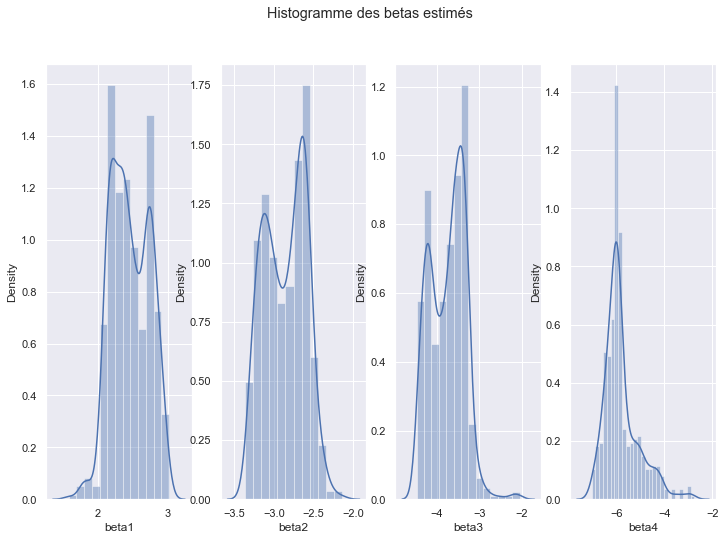

In [265]:
import seaborn as sns
fig, axes = plt.subplots(1,4, figsize=(12,8))
fig.suptitle('Histogramme des betas estimés')
sns.set(font_scale=1)
d = sns.distplot(beta_fits.loc[:,'beta1'], ax=axes[0])
d = sns.distplot(beta_fits.loc[:,'beta2'], ax=axes[1])
d = sns.distplot(beta_fits.loc[:,'beta3'], ax=axes[2])
d = sns.distplot(beta_fits.loc[:,'beta4'], ax=axes[3])

D'après les differents papiers de recherche et les graphes obtenus ainsi que les résiduels, predire les parametres de Nelson Siegel Svensson est equivalent a predire les taux pour les pilliers de maturité. <br>
On utilisera un modele

/Users/rayenayari/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

/Users/rayenayari/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

/Users/rayenayari/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

/Users/rayenayari/opt/anaconda3/lib/python3.7/

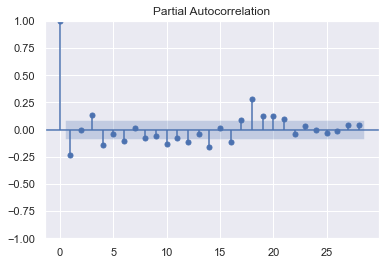

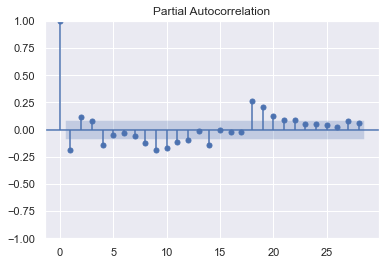

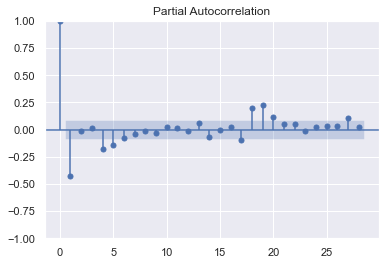

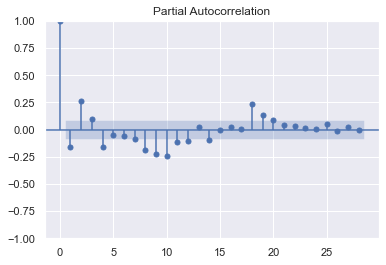

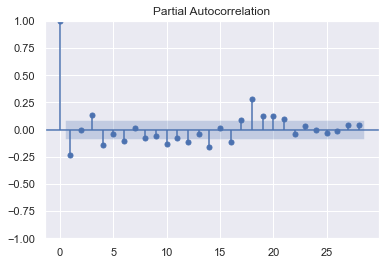

In [286]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(beta_fits.loc[:,'beta1'])
plot_pacf(beta_fits.loc[:,'beta2'])
plot_pacf(beta_fits.loc[:,'beta3'])
plot_pacf(beta_fits.loc[:,'beta4'])

Le PACF est une alternative à l'ACF. Plutôt que de donner les autocorrélations, il vous donne l'autocorrélation partielle. Cette autocorrélation est appelée partielle, car à chaque pas en arrière dans le passé, seule une autocorrélation supplémentaire est répertoriée. Ceci est différent de l'ACF, car l'ACF contient des corrélations en double lorsque la variabilité peut être expliquée par plusieurs points dans le temps.

Par exemple, si la valeur d'aujourd'hui est la même que la valeur d'hier, mais également la même que celle d'avant-hier, l'ACF afficherait deux étapes hautement corrélées. Le PACF ne montrerait qu'hier et supprimerait avant-hier.
On utilisera donc un modele AR

In [334]:
beta_fits.loc[:beta_fits.index[3]]

,beta1,beta2,beta3,beta4
2020-01-01,2.905946,-3.330230,-4.173525,-6.293086
2020-01-02,2.887765,-3.266257,-4.180106,-6.392610
2020-01-03,2.850664,-3.181191,-4.245382,-6.448333
2020-01-06,2.885737,-3.232410,-4.209206,-6.566509


In [397]:
beta_fits.index[0]

Timestamp('2020-01-01 00:00:00')

In [514]:
import datetime as dt
import statsmodels
import numpy.random as random
#fct de progression
def perDone(i, length, goal):
    if i != 0:
        if (float(i)/length) *100 > goal:
            print("{}% fait".format(goal))
            return 10;
        else:
            return 0
        
def ARforecast(ratedata, beta_fits):
# on va prendre 80% des données pour entrainer le modele qui correspond a la date  2021-04-07
# Il faut donc trier les trames de donnees par date ascendante
    beta_fits.sort_index(inplace=True)
    ratedata.sort_index(inplace=True)
    residuels.sort_index(inplace=True)

    idx_2021 = ratedata.index.get_loc(dt.datetime.strptime('2021-04-06', '%Y-%m-%d'))
    idx_2022 = ratedata.index.get_loc(dt.datetime.strptime('2022-02-08', '%Y-%m-%d'))

    # from the CWT, predict each level using an AR model 
    N_out = idx_2022 - idx_2021 # N out of sample
    N_out=220
    # on cree les trames de données pour les betas et les taux d interet
    beta_predict_naive = pd.DataFrame(index=beta_fits.index[idx_2021:idx_2022], columns=beta_fits.columns)

    yield_forecast_naive = pd.DataFrame(index=beta_fits.index[idx_2021:idx_2022], columns=ratedata.columns)

    beta_predict_random = pd.DataFrame(index=beta_fits.index[idx_2021:idx_2022], columns=beta_fits.columns)

    yield_forecast_random =  pd.DataFrame(index=beta_fits.index[idx_2021:idx_2022
                             ], columns=ratedata.columns)

    d=10
    models=[]
    for date in range(0, N_out):
        #d_updt = perDone(date, N_out, d)
        #d = d_updt + d
        now = idx_2021+date # step each turn to fit

        for beta in beta_fits.columns:

            # Ar forecast naive 
            model = statsmodels.tsa.ar_model.AutoReg(beta_fits.loc[:beta_fits.index[now],beta],lags=3).fit()
            # la longueur de la data doit etre paire
          
            beta_predict_naive.loc[beta_predict_naive.index[date], beta] = \
            model.predict(len(beta_fits.loc[:beta_fits.index[now],beta])-1\
                          ,len(beta_fits.loc[:beta_fits.index[now],beta])).iloc[-1]
            print(date)
            print( beta_predict_naive.loc[beta_predict_naive.index[date], beta])
            
            beta_predict_random.loc[beta_predict_random.index[date], beta] = \
                beta_fits.loc[beta_fits.index[now-1], beta] +\
                 (beta_fits.loc[beta_fits.index[now-1], beta].std())*random.randn()
        # prediction des yields a differentes maturités
            yield_forecast_naive.loc[yield_forecast_naive.index[date],:] = beta_predict_naive.loc[beta_predict_naive.index[date], 'beta1'] + \
               beta_predict_naive.loc[beta_predict_naive.index[date], 'beta2']*_load2(maturities) +\
               beta_predict_naive.loc[beta_predict_naive.index[date], 'beta3']*_load3(maturities) +\
               beta_predict_naive.loc[beta_predict_naive.index[date], 'beta4']*_load4(maturities)
            
            yield_forecast_random.loc[yield_forecast_random.index[date],:] = beta_predict_random.loc[beta_predict_random.index[date], 'beta1'] + \
                beta_predict_random.loc[beta_predict_random.index[date], 'beta2']*_load2(maturities) +\
                beta_predict_random.loc[beta_predict_random.index[date], 'beta3']*_load3(maturities) +\
                beta_predict_random.loc[beta_predict_random.index[date], 'beta4']*_load4(maturities)
            models.append(model)
    return yield_forecast_naive, yield_forecast_random ,models
    


In [ ]:
yield_forecast_naive, yield_forecast_random,models=ARforecast(ratedata, beta_fits)

In [542]:
yield_forecast_naive

maturity,3,6,12,24,36,48,60,72,84,96,108,120,180,240,360
2021-04-06,-0.521808,-0.645171,-0.779087,-0.790929,-0.66982,-0.527425,-0.400981,-0.298122,-0.216091,-0.149535,-0.093371,-0.043614,0.180191,0.412949,0.866445
2021-04-07,-0.525274,-0.648473,-0.782571,-0.795948,-0.676963,-0.536712,-0.412207,-0.311016,-0.230377,-0.164958,-0.109707,-0.060668,0.161598,0.394737,0.850749
2021-04-08,-0.519474,-0.646518,-0.786225,-0.805405,-0.688404,-0.548468,-0.423602,-0.321827,-0.240579,-0.174605,-0.11888,-0.069452,0.153757,0.386869,0.841913
2021-04-09,-0.525865,-0.645746,-0.774424,-0.780095,-0.65569,-0.511222,-0.383262,-0.279198,-0.196191,-0.128867,-0.072135,-0.022005,0.20117,0.430613,0.875274
2021-04-12,-0.519012,-0.640172,-0.77033,-0.776545,-0.651466,-0.506144,-0.377467,-0.272871,-0.189472,-0.121835,-0.064821,-0.0144,0.210832,0.443297,0.894635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,-0.636813,-0.667648,-0.664256,-0.522759,-0.331216,-0.154008,-0.008062,0.107334,0.198159,0.27089,0.330961,0.382469,0.586549,0.767704,1.093073
2022-02-02,-0.647939,-0.671114,-0.657582,-0.508361,-0.3168,-0.142078,0.000925,0.113624,0.202153,0.272955,0.331372,0.381416,0.579165,0.754116,1.067752
2022-02-03,-0.667665,-0.651983,-0.582624,-0.376565,-0.164462,0.016342,0.160136,0.27193,0.3591,0.428399,0.485154,0.533284,0.715914,0.867999,1.130798
2022-02-04,-0.655034,-0.608375,-0.496884,-0.255613,-0.039727,0.133554,0.26688,0.368443,0.446607,0.50824,0.558492,0.601038,0.763255,0.899983,1.138213


2021-04-07   -0.639
2021-04-08   -0.633
2021-04-09   -0.633
2021-04-12   -0.636
2021-04-13   -0.634
              ...  
2022-02-01   -0.679
2022-02-02   -0.677
2022-02-03   -0.674
2022-02-04   -0.666
2022-02-07   -0.674
Name: 3, Length: 219, dtype: float64

In [ ]:
yield_forecast_naive[3]-

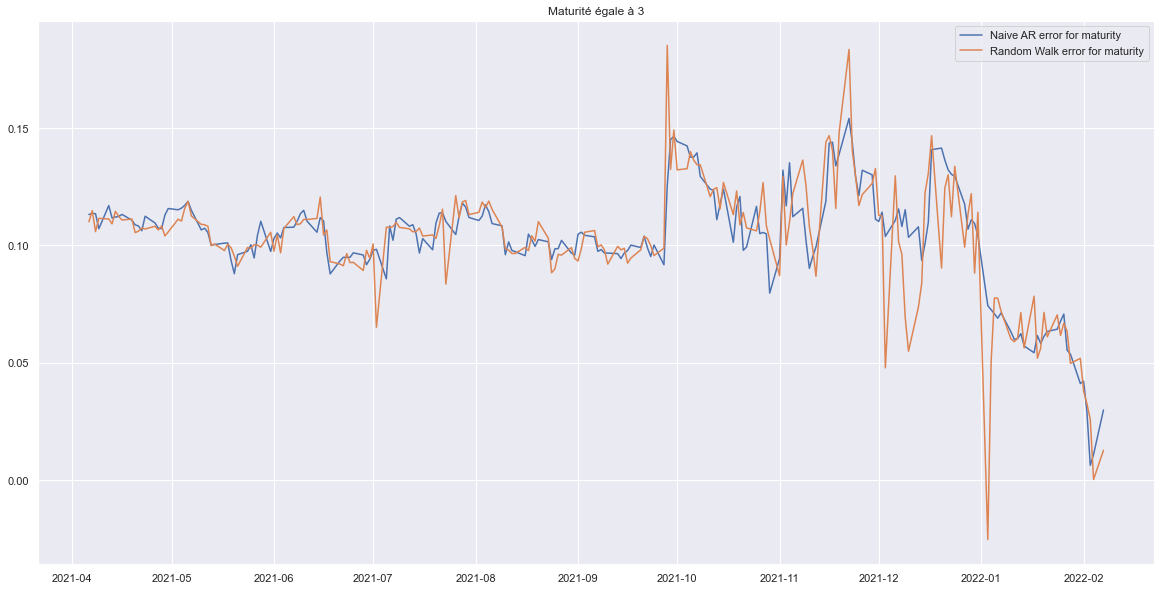

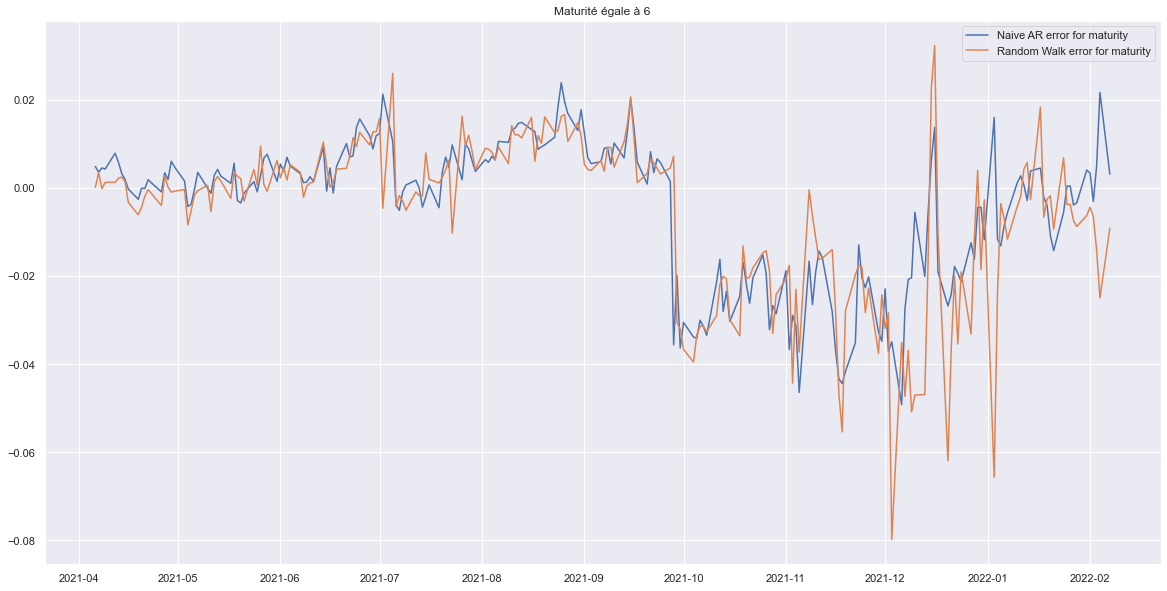

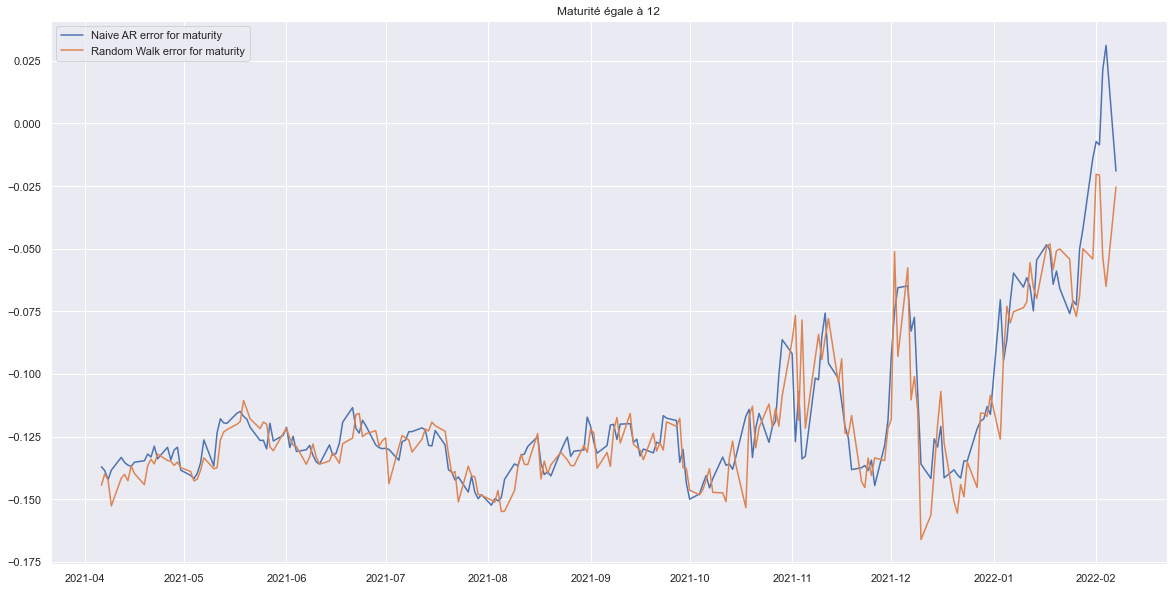

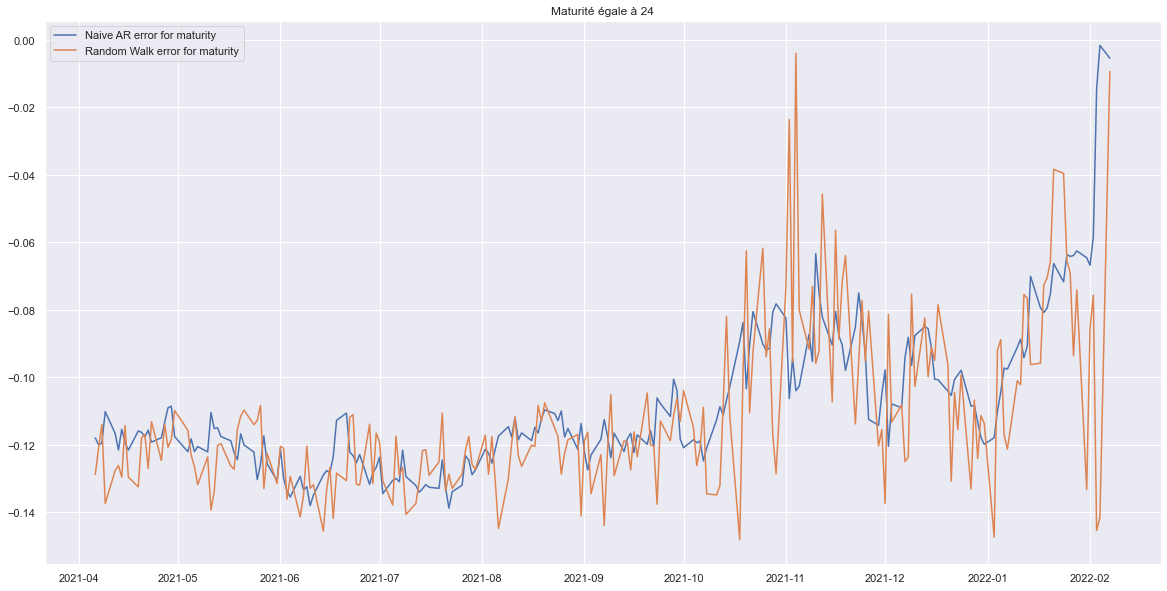

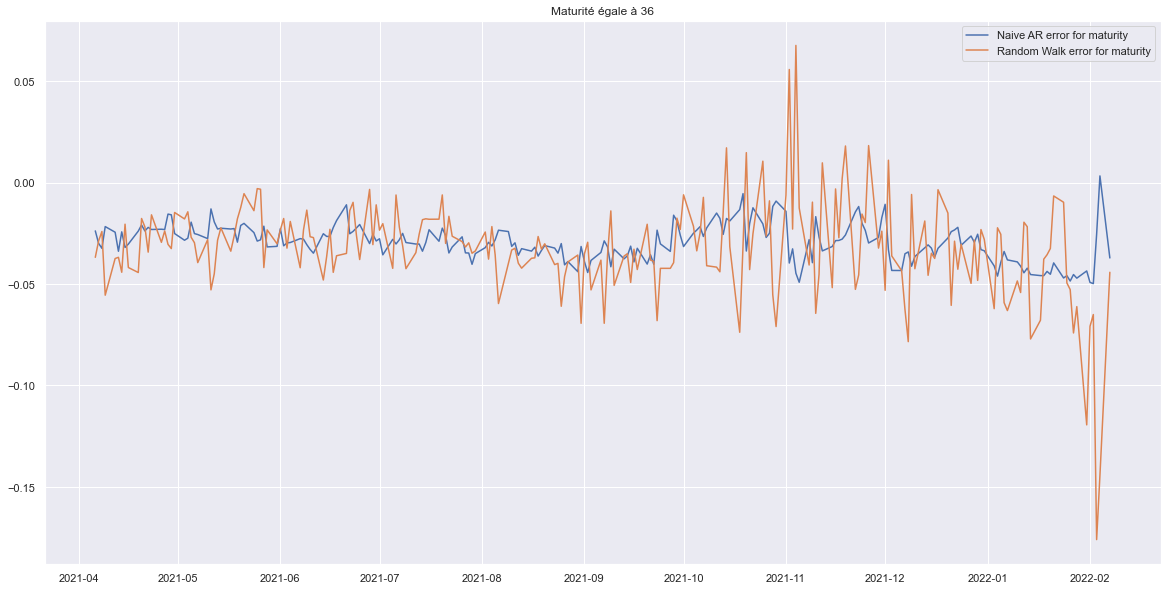

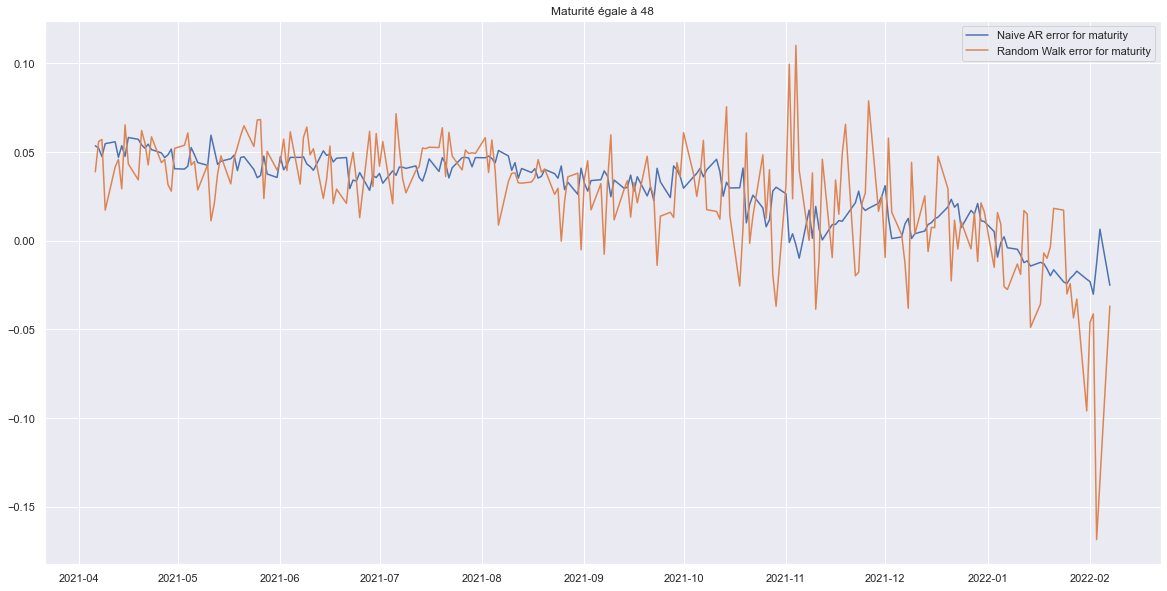

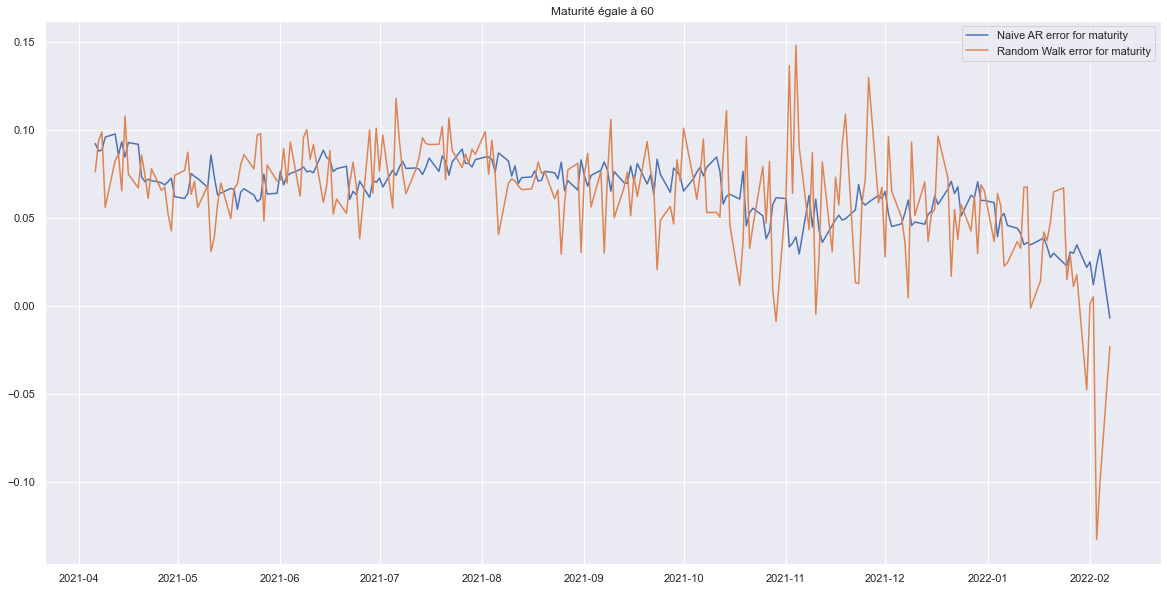

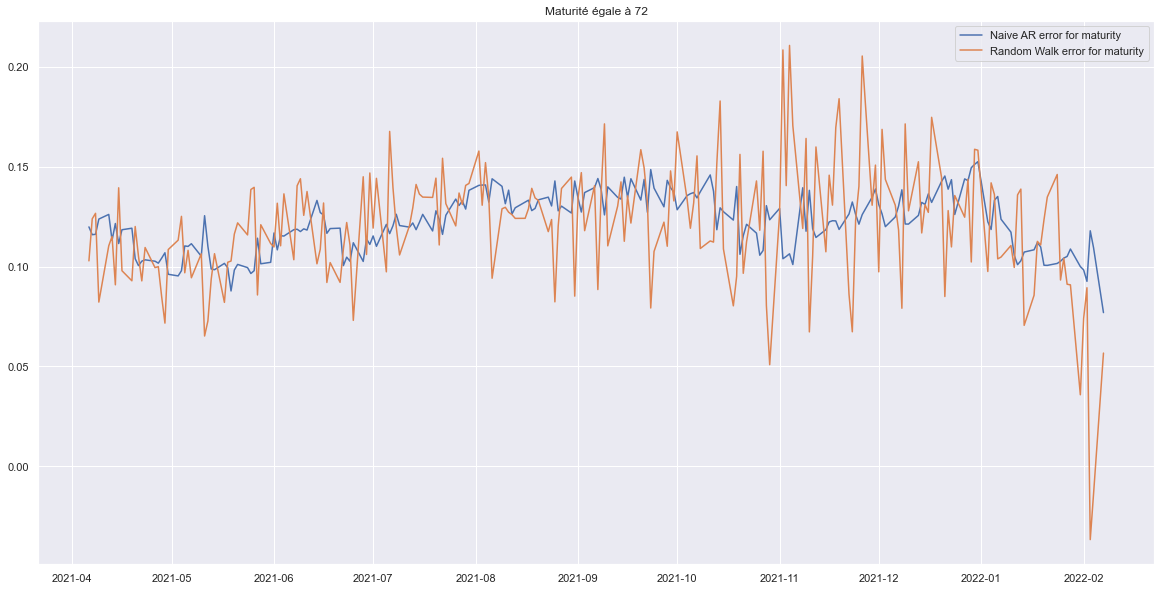

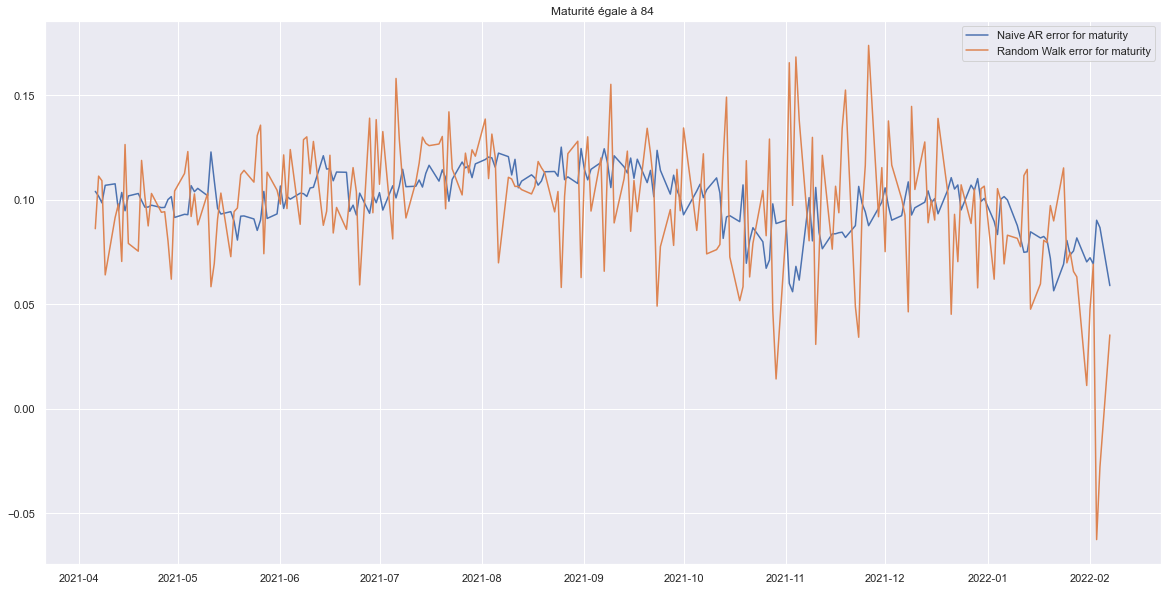

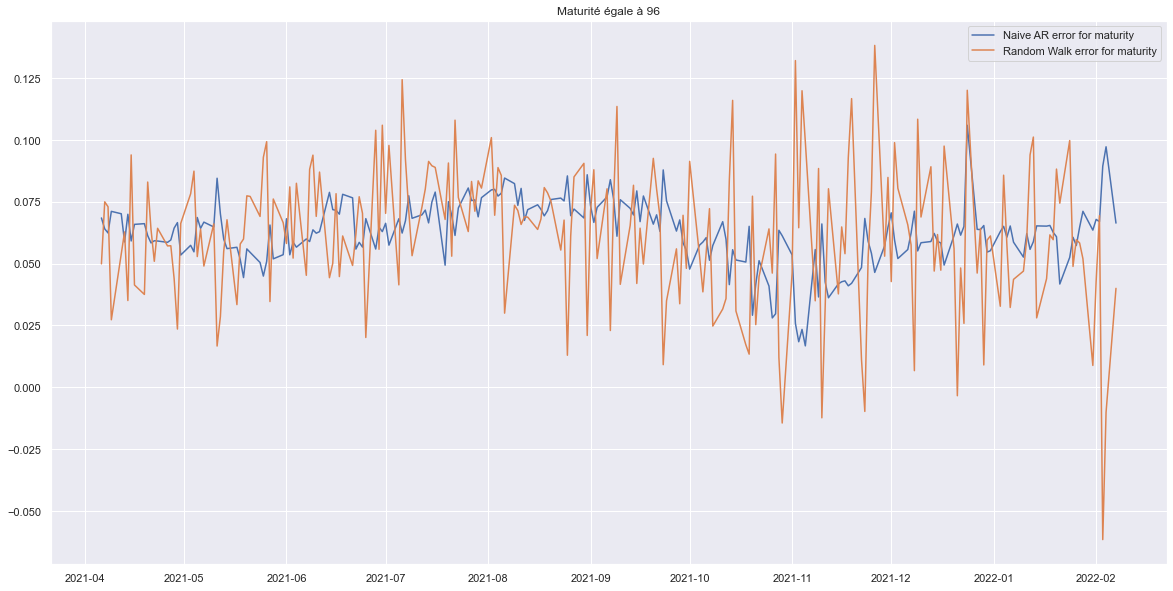

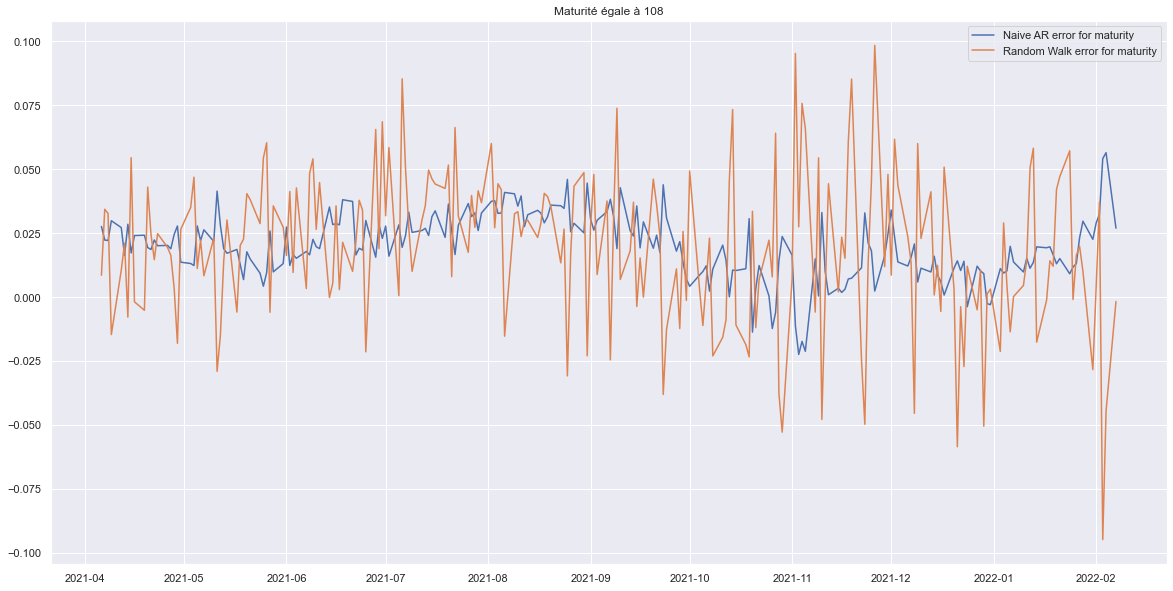

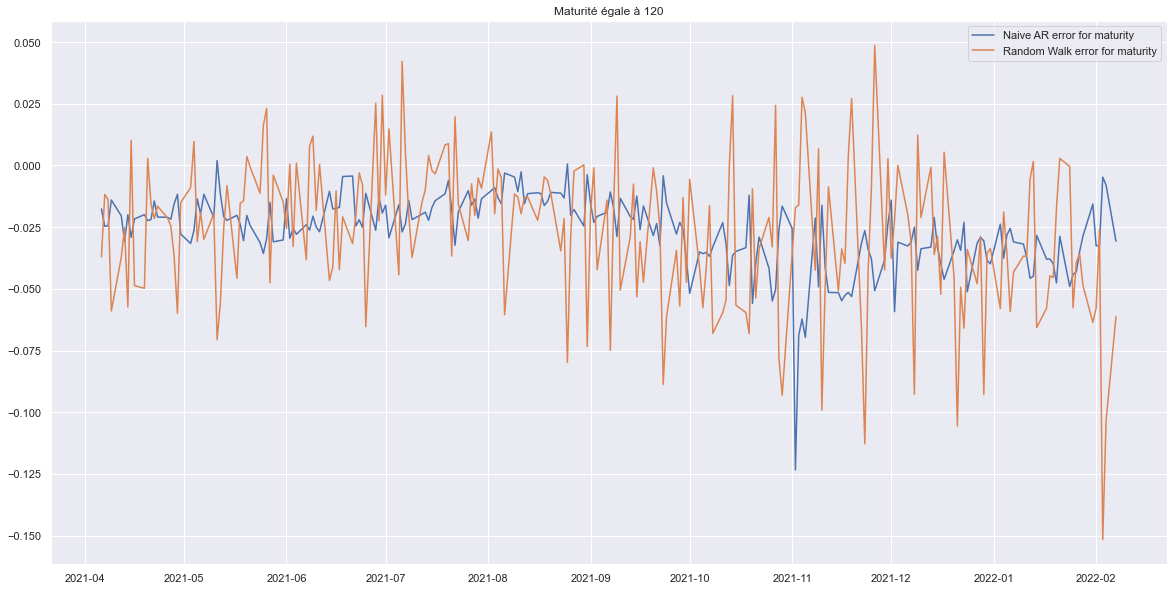

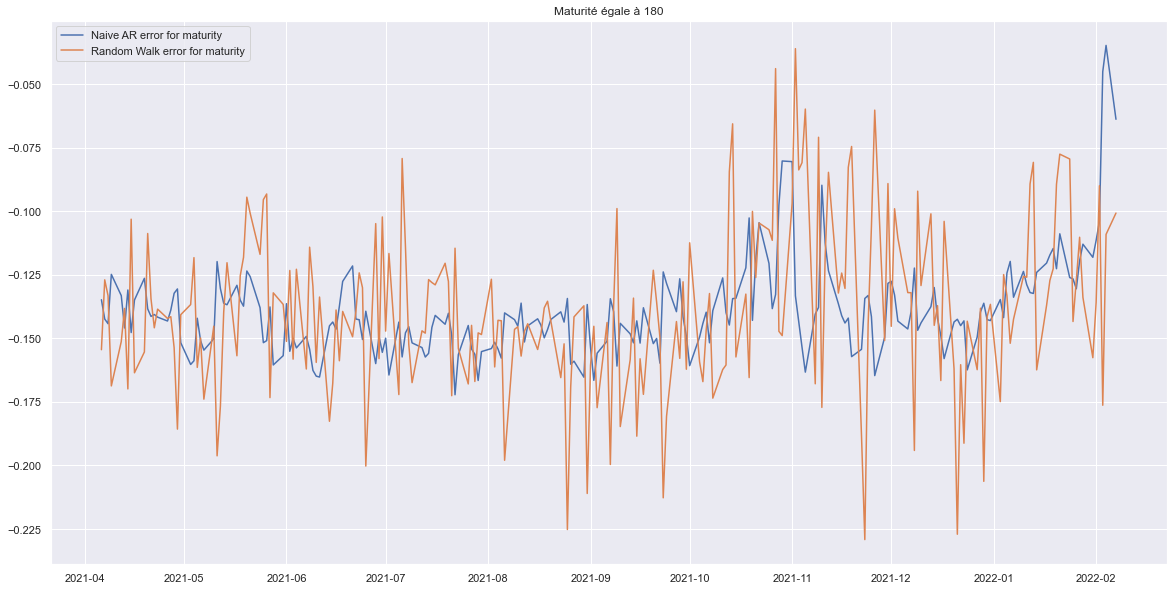

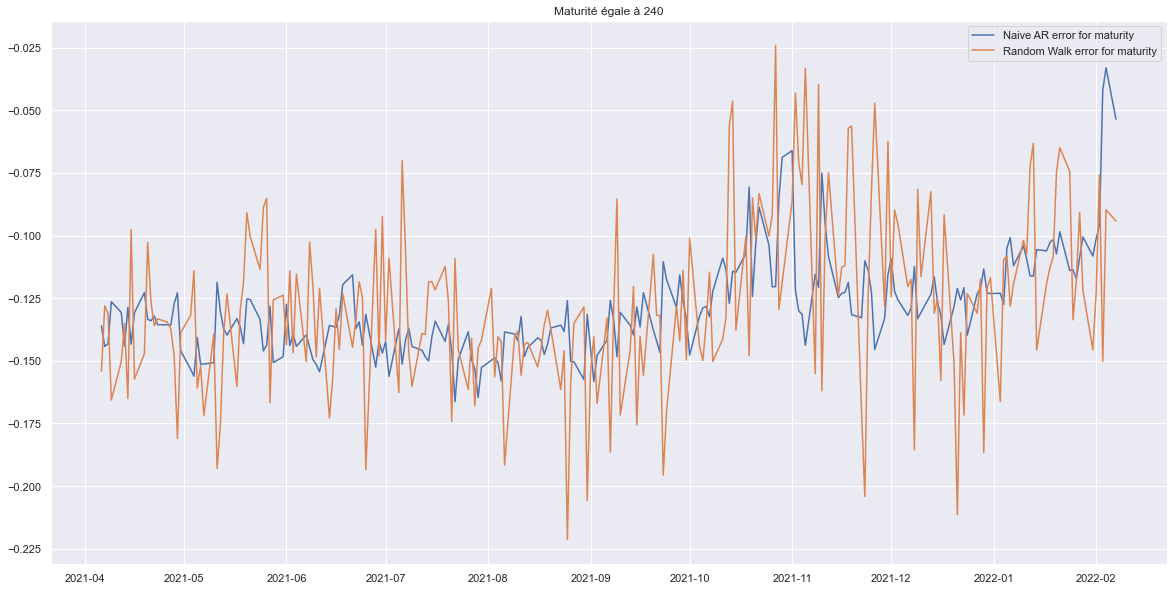

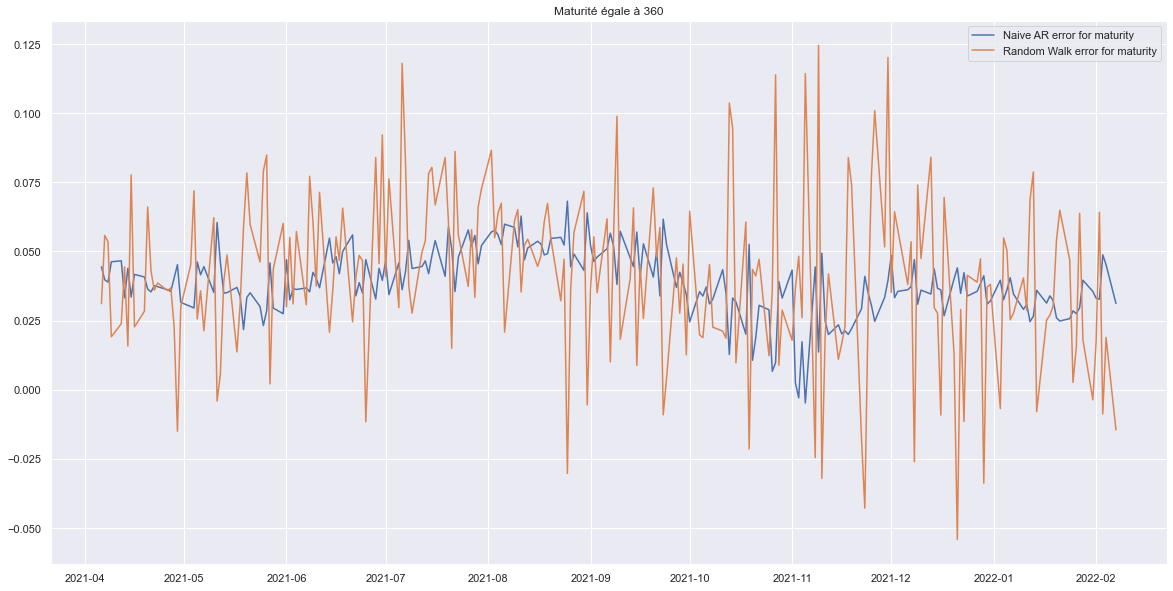

In [538]:
for maturity in maturities:
    fig = plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)
    ax.set_title("Maturité égale à "+str(maturity))
    
    plt.plot(yield_forecast_naive.index,yield_forecast_naive[maturity]-ratedata[idx_2021-1:idx_2022][maturity],label="Naive AR error for maturity")
    plt.plot(yield_forecast_random.index,yield_forecast_random[maturity]-ratedata[idx_2021-1:idx_2022][maturity],label="Random Walk error for maturity")
    ax.legend(loc='best')
    plt.show()



In [549]:
b=model.predict("2020-08-03","2020-08-05")

# Forecast 

Comme on a déja montré que les betas reflètent le taux, on peut faire un forecast des betas sur un an et deduire le taux d'interet.

In [567]:
# On a sauvegardé les modeles dans models Précédemment.
beta1=models[0].predict("2021-04-07","2022-04-07")
beta2=models[1].predict("2021-04-07","2022-04-07")
beta3=models[0].predict("2021-04-07","2022-04-07")
beta4=models[0].predict("2021-04-07","2022-04-07")
# Creation de Taux
taux= pd.DataFrame(index=beta1.index ,columns=ratedata.columns)
for date in range(len (taux.index)):
    taux.loc[taux.index[date],:] = beta1.loc[beta1.index[date]] + \
                beta2.loc[beta2.index[date]]*_load2(maturities) +\
                beta3.loc[beta3.index[date]]*_load3(maturities) +\
                beta4.loc[beta4.index[date]]*_load4(maturities)

/Users/rayenayari/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



In [568]:
taux

maturity,3,6,12,24,36,48,60,72,84,96,108,120,180,240,360
2021-04-07,0.1796,0.624863,1.322515,2.197188,2.675992,2.953513,3.125359,3.239048,3.318635,3.37666,3.419947,3.452444,3.517248,3.497121,3.381255
2021-04-08,0.177455,0.620707,1.315222,2.185993,2.662689,2.939004,3.110114,3.22332,3.302572,3.360354,3.403462,3.435826,3.500386,3.480387,3.365104
2021-04-09,0.174525,0.616022,1.307807,2.175211,2.65011,2.925412,3.095909,3.208718,3.287698,3.345284,3.388248,3.420506,3.484891,3.465033,3.350307
2021-04-12,0.171678,0.611554,1.30082,2.165119,2.638365,2.912735,3.082671,3.195118,3.273847,3.331254,3.374087,3.406249,3.470478,3.450754,3.33655
2021-04-13,0.169158,0.607446,1.294241,2.155489,2.627103,2.900551,3.069929,3.182014,3.260494,3.317721,3.360422,3.392487,3.456554,3.436954,3.323247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,0.096904,0.484999,1.093624,1.858144,2.277891,2.521923,2.673452,2.773925,2.844385,2.895831,2.934275,2.9632,3.021856,3.00597,2.907674
2022-04-04,0.096904,0.484998,1.093622,1.858141,2.277888,2.521919,2.673448,2.773921,2.84438,2.895827,2.93427,2.963196,3.021852,3.005966,2.907669
2022-04-05,0.096903,0.484997,1.093621,1.858138,2.277884,2.521916,2.673444,2.773917,2.844376,2.895823,2.934266,2.963192,3.021847,3.005962,2.907665
2022-04-06,0.096903,0.484996,1.093619,1.858136,2.277881,2.521912,2.67344,2.773913,2.844372,2.895819,2.934262,2.963187,3.021843,3.005958,2.907661
